In [4]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


from scipy.stats import norm
import statsmodels.api as sm
from datetime import datetime

from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pmdarima as pm
from pmdarima.arima import StepwiseContext

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

from datetime import date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import model_selection
import xgboost as xgb

from feature_engine import categorical_encoders as ce

In [5]:
#dataset source depto 2:
df = pd.read_csv('Vendas_Depto_2.csv', parse_dates=['data1'], index_col='data1')
df_serie = df
cols = ['Unnamed: 0', 'Data',  'Empresa',  'Departamento', 'Secao']     #'Dia', 'Mes', 'Ano',
df2 = df.drop(cols, axis=1)
df_serie=df2.groupby(['data1']).agg(
    {
        'Dia_da_semana': 'first',
        'Dia': 'first',
        'Mes': 'first',
        'Ano': 'first',
        'Feriado': 'first',
        'Pagamento': 'first',
        'Vale': 'first',
        'Vendas': 'sum',
    }
)
df_serie['Fechado']=0
idx = pd.date_range('2018-01-02', '2021-02-28')
df_serie.index = pd.DatetimeIndex(df_serie.index)
df_serie = df_serie.reindex(idx, fill_value=0)
df_serie['Dia_da_semana']['2018-12-25'] = 3
df_serie['Feriado']['2018-12-25'] = 1
df_serie['Fechado']['2018-12-25'] = 1
df_serie['Dia']['2018-12-25'] = 25
df_serie['Mes']['2018-12-25'] = 12
df_serie['Ano']['2018-12-25'] = 2018

df_serie['Dia_da_semana']['2019-01-01'] = 3
df_serie['Feriado']['2019-01-01'] = 1
df_serie['Fechado']['2019-01-01'] = 1
df_serie['Dia']['2019-01-01'] = 1
df_serie['Mes']['2019-01-01'] = 1
df_serie['Ano']['2019-01-01'] = 2019

df_serie['Dia_da_semana']['2019-12-25'] = 4
df_serie['Feriado']['2019-12-25'] = 1
df_serie['Fechado']['2019-12-25'] = 1
df_serie['Dia']['2019-12-25'] = 25
df_serie['Mes']['2019-12-25'] = 12
df_serie['Ano']['2019-12-25'] = 2019

df_serie['Dia_da_semana']['2020-01-01'] = 4
df_serie['Feriado']['2020-01-01'] = 1
df_serie['Fechado']['2020-01-01'] = 1
df_serie['Dia']['2020-01-01'] = 1
df_serie['Mes']['2020-01-01'] = 1
df_serie['Ano']['2020-01-01'] = 2020

df_serie['Dia_da_semana']['2020-12-25'] = 6
df_serie['Feriado']['2020-12-25'] = 1
df_serie['Fechado']['2020-12-25'] = 1
df_serie['Dia']['2020-12-25'] = 25
df_serie['Mes']['2020-12-25'] = 12
df_serie['Ano']['2020-12-25'] = 2020

df_serie['Dia_da_semana']['2021-01-01'] = 6
df_serie['Feriado']['2021-01-01'] = 1
df_serie['Fechado']['2021-01-01'] = 1
df_serie['Dia']['2021-01-01'] = 1
df_serie['Mes']['2021-01-01'] = 1
df_serie['Ano']['2021-01-01'] = 2021


ipykernel_launcher:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\csati\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
ipykernel_launcher:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [6]:
df_serie.dtypes

Dia_da_semana      int64
Dia                int64
Mes                int64
Ano                int64
Feriado            int64
Pagamento          int64
Vale               int64
Vendas           float64
Fechado            int64
dtype: object

In [7]:
df_serie['Dia_da_semana']=df_serie['Dia_da_semana'].astype(str)

In [8]:
df_serie['Dia']=df_serie['Dia'].astype(str)
df_serie['Mes']=df_serie['Mes'].astype(str)
df_serie['Ano']=df_serie['Ano'].astype(str)

In [9]:
df_serie.dtypes

Dia_da_semana     object
Dia               object
Mes               object
Ano               object
Feriado            int64
Pagamento          int64
Vale               int64
Vendas           float64
Fechado            int64
dtype: object

In [10]:
df_serie

,Dia_da_semana,Dia,Mes,Ano,Feriado,Pagamento,Vale,Vendas,Fechado
2018-01-02,3,2,1,2018,0,0,0,2497526.44,0
2018-01-03,4,3,1,2018,0,0,0,2295633.32,0
2018-01-04,5,4,1,2018,0,0,0,2179458.77,0
2018-01-05,6,5,1,2018,0,1,0,3160763.42,0
2018-01-06,7,6,1,2018,0,0,0,3791617.67,0
...,...,...,...,...,...,...,...,...,...
2021-02-24,4,24,2,2021,0,0,0,2410842.23,0
2021-02-25,5,25,2,2021,0,0,1,2717214.24,0
2021-02-26,6,26,2,2021,0,0,0,3912579.27,0
2021-02-27,7,27,2,2021,0,0,0,5747971.84,0


In [11]:
for i in range(60, 67):
    df_serie["lag_{}".format(i)] = df_serie.Vendas.shift(i)

In [12]:
df_serie

,Dia_da_semana,Dia,Mes,Ano,Feriado,Pagamento,Vale,Vendas,Fechado,lag_60,lag_61,lag_62,lag_63,lag_64,lag_65,lag_66
2018-01-02,3,2,1,2018,0,0,0,2497526.44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,4,3,1,2018,0,0,0,2295633.32,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,5,4,1,2018,0,0,0,2179458.77,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,6,5,1,2018,0,1,0,3160763.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-06,7,6,1,2018,0,0,0,3791617.67,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-24,4,24,2,2021,0,0,0,2410842.23,0,3780762.80,0.00,6917953.29,7506439.84,6025708.10,4282344.39,3177367.10
2021-02-25,5,25,2,2021,0,0,1,2717214.24,0,1812538.92,3780762.80,0.00,6917953.29,7506439.84,6025708.10,4282344.39
2021-02-26,6,26,2,2021,0,0,0,3912579.27,0,3053191.41,1812538.92,3780762.80,0.00,6917953.29,7506439.84,6025708.10
2021-02-27,7,27,2,2021,0,0,0,5747971.84,0,4666038.31,3053191.41,1812538.92,3780762.80,0.00,6917953.29,7506439.84


In [24]:
train = df_serie.loc['2018-03-09':'2020-12-31']
test = df_serie.loc['2021-01-01':]
endog_train = train['Vendas']
exog_train = train.drop(['Vendas'],axis = 1)
endog_test = test['Vendas']
exog_test = test.drop(['Vendas'],axis = 1)

In [26]:
train

,Dia_da_semana,Dia,Mes,Ano,Feriado,Pagamento,Vale,Vendas,Fechado,lag_60,lag_61,lag_62,lag_63,lag_64,lag_65,lag_66
2018-03-09,6,9,3,2018,0,0,0,2928583.78,0,2431791.38,1153524.93,3791617.67,3160763.42,2179458.77,2295633.32,2497526.44
2018-03-10,7,10,3,2018,0,0,0,4947783.67,0,2858780.87,2431791.38,1153524.93,3791617.67,3160763.42,2179458.77,2295633.32
2018-03-11,1,11,3,2018,0,0,0,1416468.91,0,2772131.23,2858780.87,2431791.38,1153524.93,3791617.67,3160763.42,2179458.77
2018-03-12,2,12,3,2018,0,0,0,1929783.80,0,2263281.71,2772131.23,2858780.87,2431791.38,1153524.93,3791617.67,3160763.42
2018-03-13,3,13,3,2018,0,0,0,2432974.94,0,2637860.94,2263281.71,2772131.23,2858780.87,2431791.38,1153524.93,3791617.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1,27,12,2020,0,0,0,1812538.92,0,2833929.21,3147793.76,2372159.34,1732961.72,4410290.53,3426578.59,2694007.18
2020-12-28,2,28,12,2020,0,0,0,3053191.41,0,2919727.60,2833929.21,3147793.76,2372159.34,1732961.72,4410290.53,3426578.59
2020-12-29,3,29,12,2020,0,0,0,4666038.31,0,4419190.59,2919727.60,2833929.21,3147793.76,2372159.34,1732961.72,4410290.53
2020-12-30,4,30,12,2020,0,0,0,6401501.24,0,5557132.16,4419190.59,2919727.60,2833929.21,3147793.76,2372159.34,1732961.72


In [25]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr})

In [27]:


onehot = ce.OneHotCategoricalEncoder(variables=['Dia_da_semana','Dia','Mes','Ano'], drop_last=True)

model_xgb = xgb.XGBRegressor(random_state=1992)

full_pipeline_xgb = Pipeline( steps=[("onehot", onehot),
                                     ('modelo', model_xgb) ] )

param_grid = { "modelo__n_estimators":[10,20,50],
               "modelo__max_depth":[3,7,8],
               "modelo__eta":[0.01, 0.1, 0.2, 0.3, 0.5],
               "modelo__subsample":[0.1, 0.2, 0.25, 0.5, 0.76, 0.8, 0.9]}

search_xgb = model_selection.GridSearchCV(full_pipeline_xgb,
                                          param_grid,
                                          cv=5,
                                          n_jobs=-1,
                                          scoring='neg_root_mean_squared_error') # Declaração

search_xgb.fit(exog_train, endog_train) # Executa o treinamento!!

best_model_xgb = search_xgb.best_estimator_

In [28]:
y_train_pred_xgb = best_model_xgb.predict(exog_train)
forecast_accuracy(y_train_pred_xgb,train.Vendas)

C:\Users\csati\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


{'mape': inf,
 'me': -1656.503855077758,
 'mae': 270802.62413326045,
 'mpe': inf,
 'rmse': 409938.57539861684,
 'corr': 0.9307028598963157}

In [29]:
y_test_pred_xgb = best_model_xgb.predict(exog_test)


In [30]:
y_test_pred_xgb

array([1786500. , 5073179.5, 1790988.9, 2169933.2, 2924237.5, 3225961.2,
       3032314. , 3301432. , 5802635.5, 1717492. , 2333579.5, 3096685.5,
       2756915.8, 2600104.5, 3181301.2, 4535557. , 1758745.1, 2204756.8,
       2915939.5, 2763137.8, 2574686.8, 3152486.8, 4724502. , 1512056.6,
       2049597. , 2956512.8, 2722538. , 2661582.5, 3790559.8, 5106665. ,
       1797110.1, 2675294.2, 2986044. , 3137568.2, 2915903.8, 3691547. ,
       5792157.5, 2316665.5, 2602413.8, 3113278.5, 3039876. , 2836763.8,
       3521771.8, 4884062. , 1844695.8, 2099589.2, 2178926.2, 2983846.8,
       2817218. , 3396313.5, 5365023. , 2269446. , 2447488. , 2995075. ,
       3686502.2, 2628081.8, 2833625. , 4214801. , 1866656.2],
      dtype=float32)

In [31]:


forecast_accuracy(y_test_pred_xgb,test.Vendas)

{'mape': inf,
 'me': -160311.72474576294,
 'mae': 405280.40864406776,
 'mpe': inf,
 'rmse': 573250.6991228674,
 'corr': 0.8758267122863516}

In [32]:
test['pred'] = y_test_pred_xgb

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
test

,Dia_da_semana,Dia,Mes,Ano,Feriado,Pagamento,Vale,Vendas,Fechado,lag_60,lag_61,lag_62,lag_63,lag_64,lag_65,lag_66,pred
2021-01-01,6,1,1,2021,1,0,0,0.00,1,2114684.83,2282685.17,5557132.16,4419190.59,2919727.60,2833929.21,3147793.76,1786500.000
2021-01-02,7,2,1,2021,0,0,0,3699616.45,0,3407172.73,2114684.83,2282685.17,5557132.16,4419190.59,2919727.60,2833929.21,5073179.500
2021-01-03,1,3,1,2021,0,0,0,1743642.55,0,3510893.57,3407172.73,2114684.83,2282685.17,5557132.16,4419190.59,2919727.60,1790988.875
2021-01-04,2,4,1,2021,0,0,0,2846455.97,0,3362687.54,3510893.57,3407172.73,2114684.83,2282685.17,5557132.16,4419190.59,2169933.250
2021-01-05,3,5,1,2021,0,0,0,3714500.29,0,4407243.81,3362687.54,3510893.57,3407172.73,2114684.83,2282685.17,5557132.16,2924237.500
2021-01-06,4,6,1,2021,0,0,0,4438251.79,0,7332387.49,4407243.81,3362687.54,3510893.57,3407172.73,2114684.83,2282685.17,3225961.250
2021-01-07,5,7,1,2021,0,1,0,3421694.15,0,2277944.54,7332387.49,4407243.81,3362687.54,3510893.57,3407172.73,2114684.83,3032314.000
2021-01-08,6,8,1,2021,0,0,0,4092655.53,0,2811935.99,2277944.54,7332387.49,4407243.81,3362687.54,3510893.57,3407172.73,3301432.000
2021-01-09,7,9,1,2021,0,0,0,6123398.30,0,3682218.18,2811935.99,2277944.54,7332387.49,4407243.81,3362687.54,3510893.57,5802635.500
2021-01-10,1,10,1,2021,0,0,0,2335309.13,0,3082432.72,3682218.18,2811935.99,2277944.54,7332387.49,4407243.81,3362687.54,1717492.000


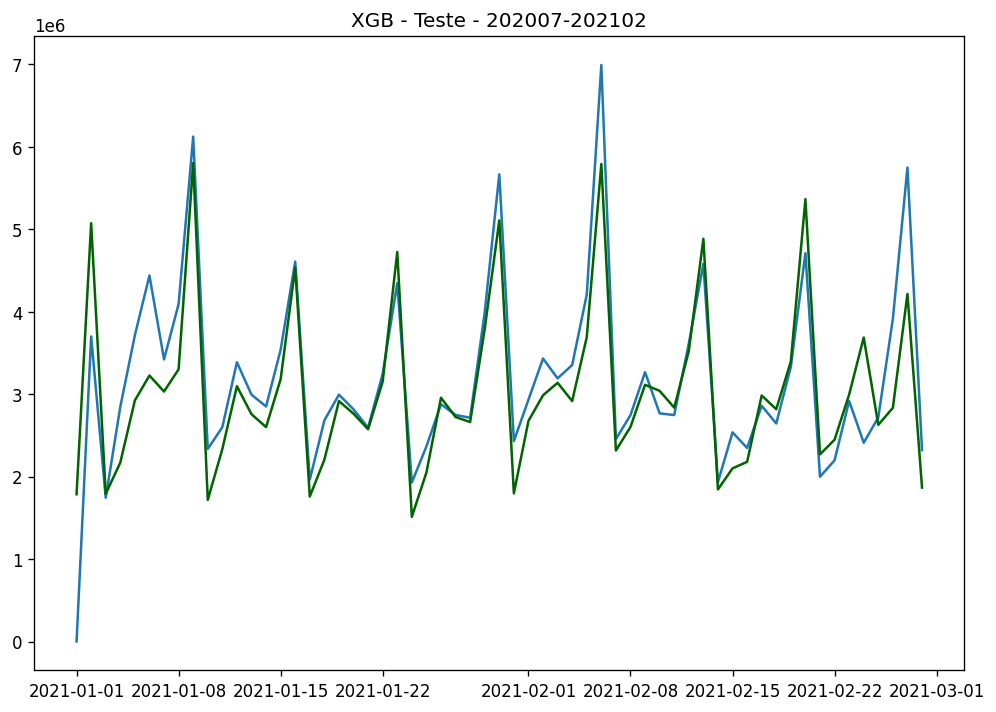

In [34]:
plt.plot(test.Vendas)
plt.plot(test.pred, color='darkgreen')


plt.title("XGB - Teste - 202007-202102")
plt.show()